In [24]:
import rasterio as rio
import rioxarray
from rasterio.plot import show
from rasterio.plot import show_hist
from pyproj import CRS
import matplotlib.pyplot as plt

In [16]:
surface = rioxarray.open_rasterio("C:\BecodeTheano4\Assets\DSM\GeoTIFF\DHMVIIDSMRAS1m_k01.tif")
surface

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    _FillValue:          -9999.0
    scale_factor:        1.0
    add_offset:          0.0

In [11]:
print(surface.rio.crs)
print(surface.rio.nodata)
print(surface.rio.bounds())
print(surface.rio.width)
print(surface.rio.height)


EPSG:31370
-9999.0
(145000.0, 238000.0, 162000.0, 247000.0)
17000
9000


In [14]:
surface.values


array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

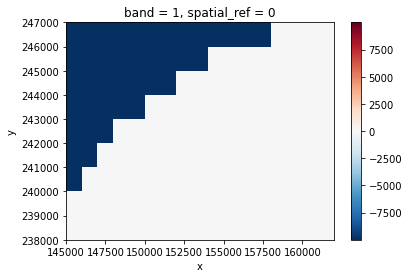

In [15]:
surface.plot()


In [18]:
epsg = surface.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Derived Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [19]:
crs.area_of_use


AreaOfUse(west=2.5, south=49.5, east=6.4, north=51.51, name='Belgium - onshore.')

In [20]:
surface.rio.crs

CRS.from_epsg(31370)

In [21]:
print(surface.min())
print(surface.max())
print(surface.mean())
print(surface.std())


<xarray.DataArray ()>
array(-9999., dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(98.56, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(-2602.6187, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(4400.6685, dtype=float32)
Coordinates:
    spatial_ref  int32 0


In [22]:
surface.shape

(1, 9000, 17000)

In [27]:
surface.plot.imshow(robust=True)

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.